In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM


In [41]:
#replace with path to incidentfacttable.csv
df_shoot =  pd.read_csv('\\csv\\incidentfacttable.csv')

In [42]:
df_casual = df_shoot[["num_deaths", "num_injured"]]

In [43]:
df_casual2 = df_casual.copy()

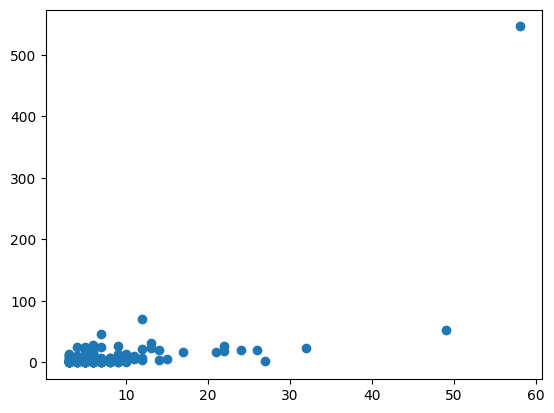

In [44]:
#plot
fig, ax = plt.subplots()
ax.scatter(df_casual['num_deaths'], df_casual['num_injured'])

In [45]:
#standardize
scaler = StandardScaler() 
arr_c = scaler.fit_transform(df_casual)
df_st = pd.DataFrame(arr_c)

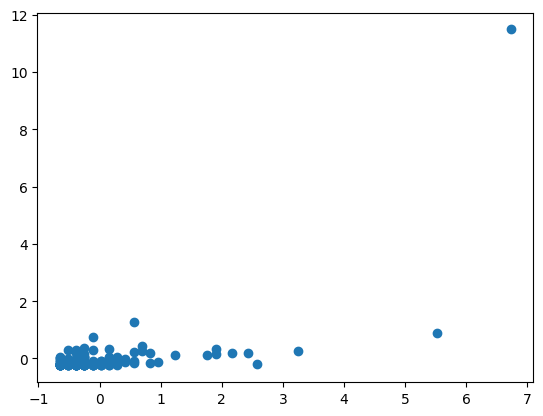

In [46]:
#plot
fig, ax = plt.subplots()
ax.scatter(df_st[0],df_st[1])

In [47]:
#use OneClassSVM to predict outliers
svm = OneClassSVM(gamma = 'scale', nu = 0.25).fit(df_st)
pre = svm.predict(df_st)

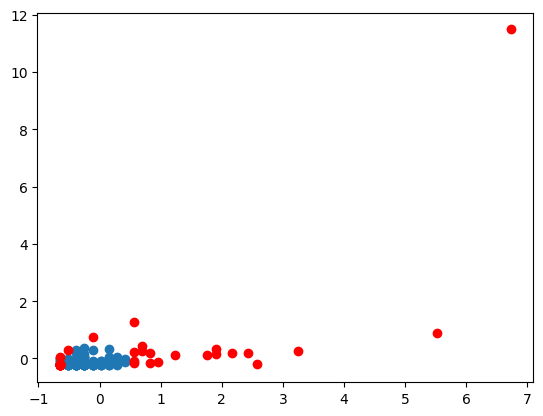

In [48]:
#filter outliers and plot in red
ou = []
inn = []
ac = arr_c.tolist()
for i in range(len(pre)):
    if pre[i] == -1:
        ou.append(ac[i])
    else:
        inn.append(ac[i])
df_ou = pd.DataFrame(ou)
df_inn = pd.DataFrame(inn)

fig, ax = plt.subplots()
ax.scatter(df_inn[0],df_inn[1])
ax.scatter(df_ou[0],df_ou[1], color = 'r')
plt.show()




In [49]:
#add outlier column to dataframe 
pre2 = pre.tolist()
df_casual2['outlier'] = pre2

In [50]:
df_casual2

,num_deaths,num_injured,outlier
0,6,1,1
1,3,5,1
2,7,1,1
3,11,10,1
4,6,6,1
...,...,...,...
135,6,14,1
136,15,6,-1
137,22,19,-1
138,6,1,1


In [52]:
df_casual2.to_csv('outlier3.csv')

In [12]:
#extreme outlier
df_casual2.iloc[49]

num_deaths      58
num_injured    546
outlier         -1
Name: 49, dtype: int64

In [13]:
#delete extreme outlier
df_casual3 = df_casual.loc[df_casual['num_injured'] <= 200]

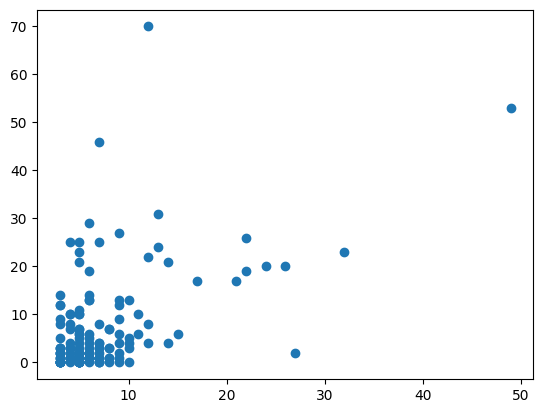

In [14]:
fig, ax = plt.subplots()
ax.scatter(df_casual3['num_deaths'], df_casual3['num_injured'])

In [15]:
#standardize
scaler = StandardScaler() 
arr_c3 = scaler.fit_transform(df_casual3)
df_st3 = pd.DataFrame(arr_c3)


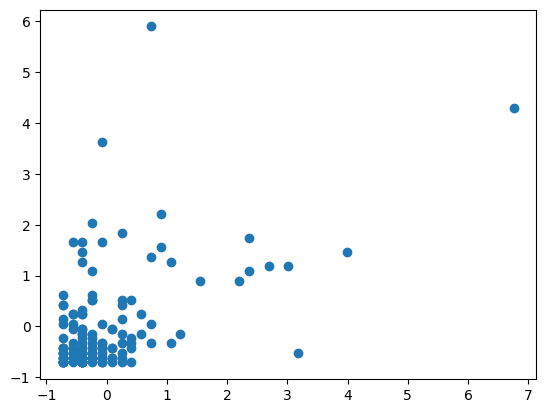

In [16]:
#plot
fig, ax = plt.subplots()
ax.scatter(df_st3[0],df_st3[1])

In [55]:
#OneClassSVM predict outliers with extreme outlier removed
svm3 = OneClassSVM(gamma = 'scale', nu = 0.25).fit(df_st3)
pre3 = svm3.predict(df_st3)

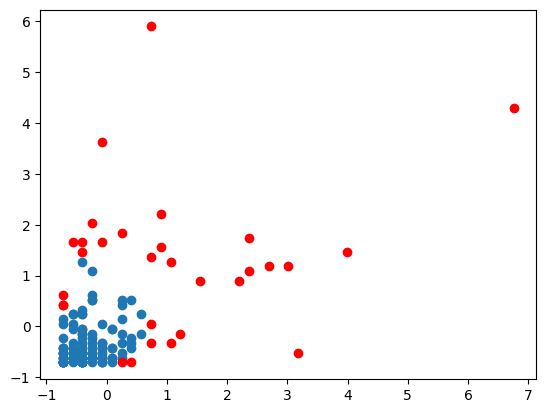

In [56]:
#filter outliers and plot in red

ou3 = []
inn3 = []
ac3 = arr_c3.tolist()
for i in range(len(pre3)):
    if pre3[i] == -1:
        ou3.append(ac3[i])
    else:
        inn3.append(ac3[i])
df_ou3 = pd.DataFrame(ou3)
df_inn3 = pd.DataFrame(inn3)

fig, ax = plt.subplots()
ax.scatter(df_inn3[0],df_inn3[1])
ax.scatter(df_ou3[0],df_ou3[1], color = 'r')
plt.show()